1. Downloading the dataset 

2. Loading the dataset into the tool 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.shape

(200, 5)

3. Visualizations

Univariate Analysis

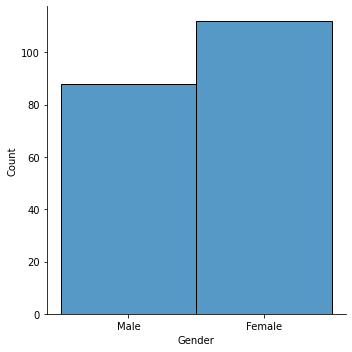

In [11]:
sns.displot(df.Gender)

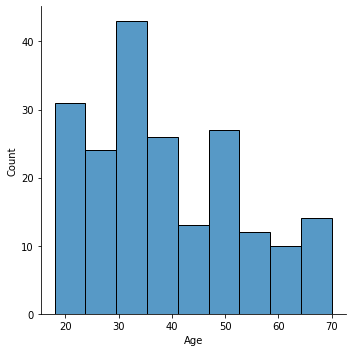

In [12]:
sns.displot(df.Age)

Bi-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


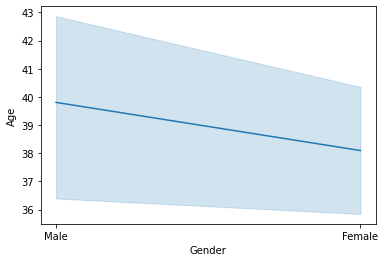

In [13]:
sns.lineplot(df.Gender,df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


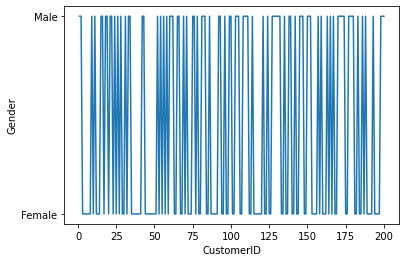

In [14]:
sns.lineplot(df.CustomerID,df.Gender)

Multi-Variate Analysis

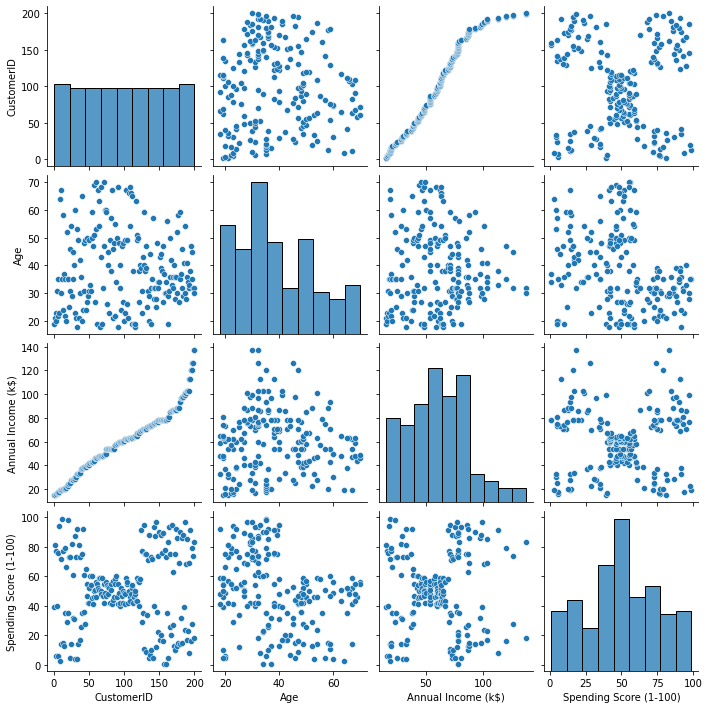

In [15]:
sns.pairplot(df)

4.Descriptive Statistics

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5.Finding Missing Values And Replacing It

In [17]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

6.Finding Outliers And Replacing them.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


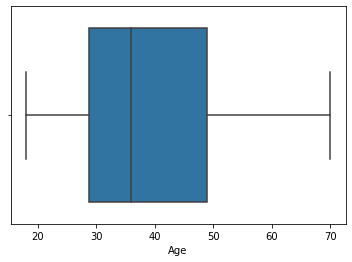

In [18]:
sns.boxplot(df.Age)

7.Checking Categorical columns and performing encoding.

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df.Gender=le.fit_transform(df.Gender)

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


8.Scaling the data

In [24]:
from sklearn.preprocessing import scale

In [25]:
X=df

In [26]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


9.Performing Clustering Algorithm.

In [27]:
from sklearn import cluster

In [28]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

In [29]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.33607611558]

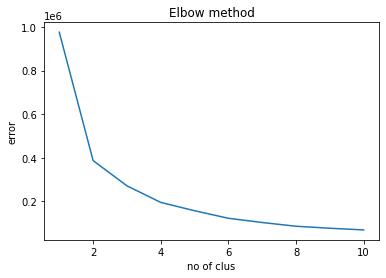

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [31]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [32]:
km_model.fit(df)

KMeans(n_clusters=3, random_state=0)

In [33]:
ykmeans =km_model.predict(df)
ykmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [34]:
km_model.predict([[1,1,19,15,39]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

10.Adding Cluster Data with Primary Dataset.

In [35]:
df['kclus'] = pd.Series(ykmeans)

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


11.Splitting Data into Dependent And independent Variables.

In [37]:
X= df.iloc[:,:-1]
X

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [38]:
y=df.kclus

12.Splitting Data into Training And Testing Data.

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [40]:
X_train.shape

(140, 5)

In [41]:
X_test.shape

(60, 5)

In [42]:
y_train.shape

(140,)

In [43]:
y_test.shape

(60,)

13.Building the Model.

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()

14.Training the model.

In [45]:
model.fit(X_train,y_train)

KNeighborsClassifier()

15.Testing the model.

In [46]:
pred_test=model.predict(X_test)

In [47]:
pred_train=model.predict(X_train)

16.Evaluating the model using evaluation metrics.

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
print('Test accuracy score: ',accuracy_score(y_test,pred_test))
print('Training accuracy score: ',accuracy_score(y_train,pred_train))

Test accuracy score:  0.8333333333333334
Training accuracy score:  0.9571428571428572


In [50]:
pd.crosstab(y_test,pred_test)

col_0,0,1,2
kclus,,,
0,16,4,0
1,1,15,4
2,0,1,19


In [51]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.75      0.75      0.75        20
           2       0.83      0.95      0.88        20

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

